Dans ce premier code, nous allons fusionner tous les csv des joueurs : 

In [79]:
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
# Définir les noms des colonnes
nom_colonnes = ['nom', 'level', 'score', 'erreurs', 'etat', 'date']
# Obtenir le répertoire actuel
current_directory = os.getcwd()
# Créer une liste pour stocker les DataFrames
all_scores = []
# Définir la valeur de level à filtrer
level_to_filter = "The Prodigy Beyondthedeathray.wav"  # Remplacez par le niveau que vous souhaitez filtrer

# Parcourir tous les fichiers dans le répertoire actuel
for filename in os.listdir(current_directory):
    # Vérifier si le fichier a une extension .csv
    if filename.endswith('.csv'):
        print(f'Processing file: {filename}')
        # Créer le chemin complet du fichier
        file_path = os.path.join(current_directory, filename)
        
        # Lire le fichier CSV avec pandas sans en-tête
        try:
            df = pd.read_csv(file_path, header=None, names=nom_colonnes)
            # Filtrer par 'level' si nécessaire
            if level_to_filter:
                df = df[df['level'] == level_to_filter]
            # Ajouter le DataFrame à la liste
            all_scores.append(df)
        except Exception as e:
            print(f'Error processing file {filename}: {e}')

# Concaténer tous les DataFrames dans un seul
final_df = pd.concat(all_scores, ignore_index=True)

# Afficher le DataFrame final
print(final_df)

Processing file: Augustin.csv
Processing file: Aure.csv
Processing file: fab.csv
Processing file: toto.csv
Processing file: victor.csv
            nom                              level   score  erreurs  \
0      Augustin  The Prodigy Beyondthedeathray.wav   10000        0   
1      Augustin  The Prodigy Beyondthedeathray.wav   10000        0   
2      Augustin  The Prodigy Beyondthedeathray.wav   10000        0   
3      Augustin  The Prodigy Beyondthedeathray.wav   10000        0   
4      Augustin  The Prodigy Beyondthedeathray.wav   10000        0   
...         ...                                ...     ...      ...   
40669    victor  The Prodigy Beyondthedeathray.wav  651800     2664   
40670    victor  The Prodigy Beyondthedeathray.wav  651800     2664   
40671    victor  The Prodigy Beyondthedeathray.wav  651800     2664   
40672    victor  The Prodigy Beyondthedeathray.wav  651800     2664   
40673    victor  The Prodigy Beyondthedeathray.wav  651800     2664   

            

Maintenant, nous allons tracer notre premier graphe : Le score des joueurs pour le niveau The Prodigy en fonction du temps.

C:\Users\vicra\AppData\Local\Temp\ipykernel_31324\2925764632.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_players))  # Utiliser une colormap


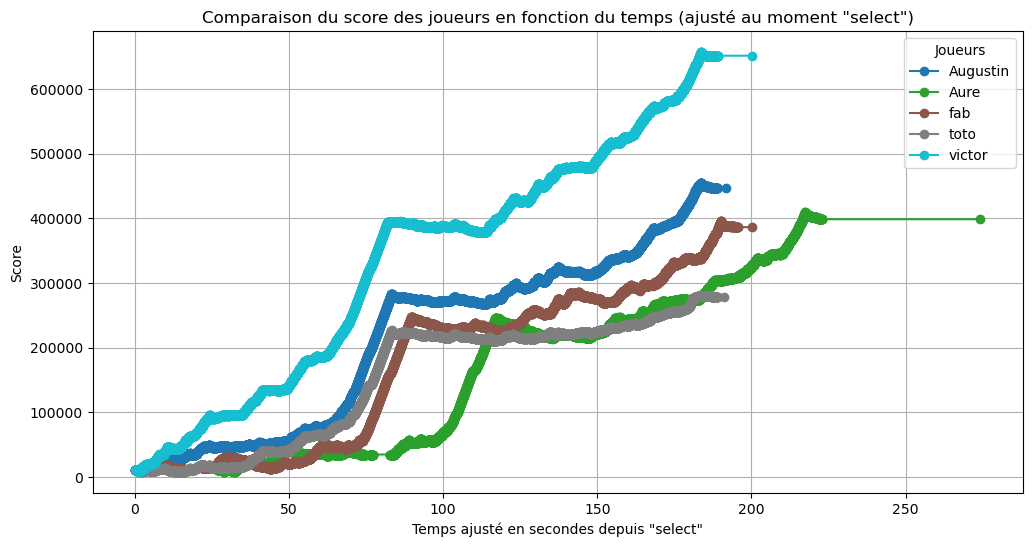

In [80]:
# Convertir la colonne 'date' en datetime
final_df['date'] = pd.to_datetime(final_df['date'])  # Pas besoin de spécifier l'unité

# Créer une nouvelle colonne pour le temps ajusté
final_df['adjusted_time'] = None

# Parcourir chaque joueur unique
for player in final_df['nom'].unique():
    player_data = final_df[final_df['nom'] == player]
    
    # Trouver le timestamp où l'état est 'select'
    select_time = player_data[player_data['etat'] == 'select lvl']['date'].min()
    
    # Ajuster le temps pour chaque score
    if select_time is not pd.NaT:  # Vérifier que select_time n'est pas NaT
        final_df.loc[final_df['nom'] == player, 'adjusted_time'] = (final_df['date'] - select_time).dt.total_seconds()

# Définir une palette de couleurs pour chaque joueur
unique_players = final_df['nom'].unique()
colors = plt.cm.get_cmap('tab10', len(unique_players))  # Utiliser une colormap

# Créer un dictionnaire pour associer chaque joueur à une couleur
player_colors = {player: colors(i) for i, player in enumerate(unique_players)}

# Tracer le graphique
plt.figure(figsize=(12, 6))
for player in final_df['nom'].unique():
    player_data = final_df[final_df['nom'] == player]
    
    # Ne garder que les données avec un temps ajusté valide
    valid_data = player_data[player_data['adjusted_time'].notnull()]
    
    plt.plot(valid_data['adjusted_time'], valid_data['score'], 
             marker='o', label=player, color=player_colors[player])

plt.title('Comparaison du score des joueurs en fonction du temps (ajusté au moment "select")')
plt.xlabel('Temps ajusté en secondes depuis "select"')
plt.ylabel('Score')
plt.legend(title='Joueurs')
plt.grid()
plt.show()

On remarque que les joueurs on globalement réagi de la même manière aux différentes occasions de gagner des points puisque les courbes présentent globalement les mêmes tendances.

Le deuxième graphe montre le nombre d'erreurs en fonction du temps pour chaque joueur :

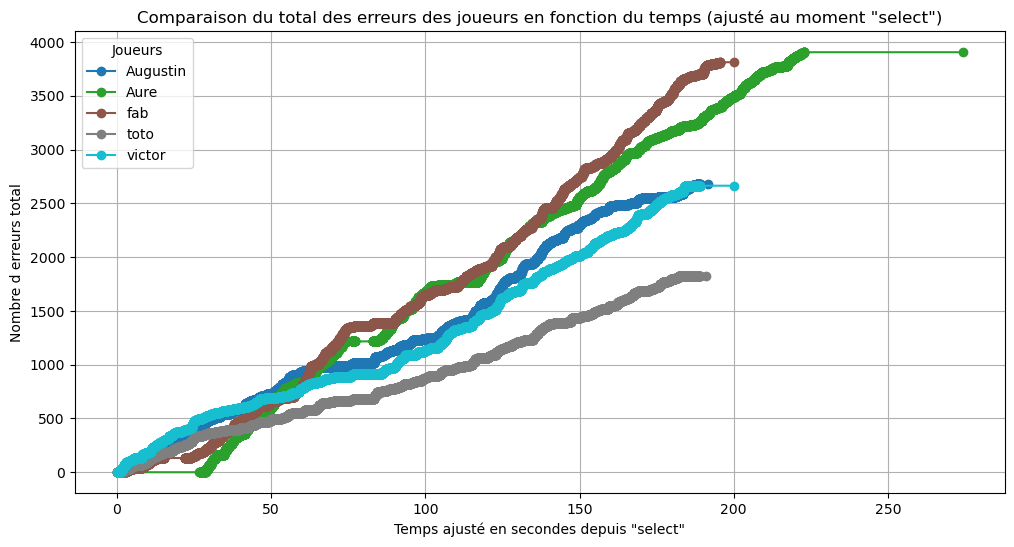

In [81]:
# Tracer le graphique
plt.figure(figsize=(12, 6))
for player in final_df['nom'].unique():
    player_data = final_df[final_df['nom'] == player]
    
    # Ne garder que les données avec un temps ajusté valide
    valid_data = player_data[player_data['adjusted_time'].notnull()]
    
    plt.plot(valid_data['adjusted_time'], valid_data['erreurs'], 
             marker='o', label=player, color=player_colors[player])

plt.title('Comparaison du total des erreurs des joueurs en fonction du temps (ajusté au moment "select")')
plt.xlabel('Temps ajusté en secondes depuis "select"')
plt.ylabel('Nombre d erreurs total')
plt.legend(title='Joueurs')
plt.grid()
plt.show()

Le nombre d'erreurs pour chaque joueur semble quasi-linéaire en fonction du temps. Ce qui signifie qu'il est difficile d'être précis lorsque l'on appuie sur une touche.

Enfin, on trace le graphe du score moyen des joueurs en fonction du temps

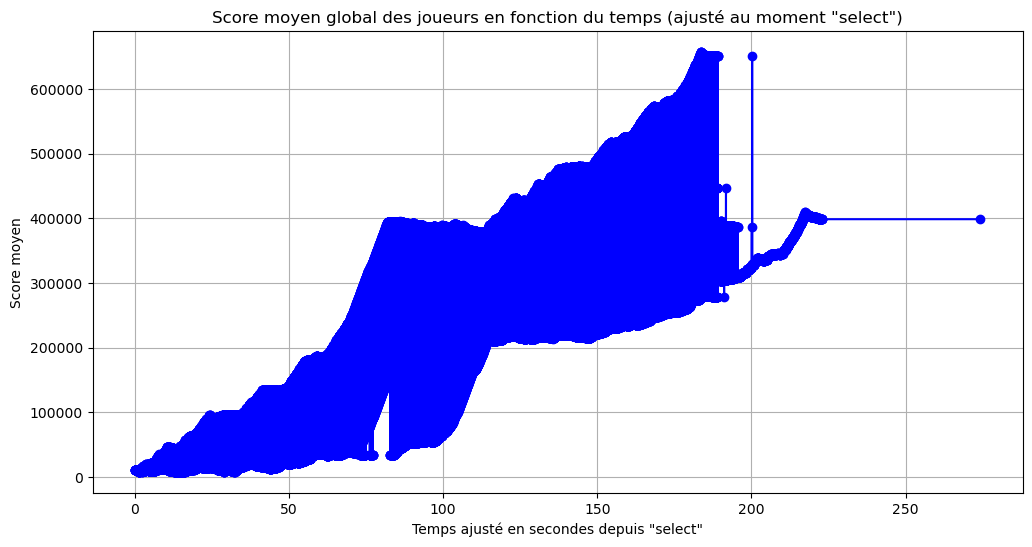

In [84]:

# Convertir la colonne 'date' en datetime
final_df['date'] = pd.to_datetime(final_df['date'])

# Créer une nouvelle colonne pour le temps ajusté
final_df['adjusted_time'] = None

# Parcourir chaque joueur unique
for player in final_df['nom'].unique():
    player_data = final_df[final_df['nom'] == player]
    
    # Trouver le timestamp où l'état est 'select'
    select_time = player_data[player_data['etat'] == 'select lvl']['date'].min()
    
    # Ajuster le temps pour chaque score
    if select_time is not pd.NaT:  # Vérifier que select_time n'est pas NaT
        final_df.loc[final_df['nom'] == player, 'adjusted_time'] = (final_df['date'] - select_time).dt.total_seconds()

# Calculer le score moyen global à chaque temps ajusté
mean_global_scores = final_df.groupby('adjusted_time')['score'].mean().reset_index()

# Tracer le graphique
plt.figure(figsize=(12, 6))
plt.plot(mean_global_scores['adjusted_time'], mean_global_scores['score'], 
         marker='o', color='blue')

plt.title('Score moyen global des joueurs en fonction du temps (ajusté au moment "select")')
plt.xlabel('Temps ajusté en secondes depuis "select"')
plt.ylabel('Score moyen')
plt.grid()
plt.show()

Etant donné que les différents scores ne sont pas enregistrés au même instant, la courbe du score moyen varie donc énormément prenant les valeurs de plein de courbes de scores différentes.